# Eight queens puzzle


You know this problem.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks,yticks
import numpy as np
import copy
import time

### ShowTable : 

Used for visualization chess table. 

In [2]:
def ShowTable(table):
    board = np.zeros((8,8))
    board[::2, ::2] = 0.5                   
    board[1::2, 1::2] = 0.5                     
    
    cl = np.array([])
    for i in range(0,8):
        for j in range(0,8):
            if table[i][j] == 'X':
                cl = np.append(cl,j)
    
    fig, ax = plt.subplots()
    ax.imshow(board,cmap='copper')

    queen = plt.imread('image/queen.png')
    extent = np.array([-0.45, 0.45, -0.45, 0.45])

    for y, x in enumerate(cl):
        ax.imshow(queen, extent=extent + [x, x, y, y])

    xticks(np.arange(8), ('A', 'B', 'C', 'D', 'E','F','G','H'))
    yticks(np.arange(8), ('1', '2', '3', '4', '5','6','7','8'))

    ax.axis('image')

    plt.show()

In [3]:
def ColRowIndex(table):
    rows = np.array([])
    cols = np.array([])
    for i in range(0,8):
        for j in range(0,8):
            if table[i][j] == 'X':
                cols = np.append(cols,j)
                rows = np.append(rows,i)
    return rows,cols

In [4]:
def ZerosTable(table):
    for i in range(0,8):
        for j in range(0,8):
            if table[i][j] != 'X':
                table[i][j] = '0'

In [5]:
def MinInCol(table):
    tableNum = copy.deepcopy(table)        
    tableNum[tableNum == 'X'] = 100
    tableNum = tableNum.astype(int)
    return np.amin(tableNum, axis=0)

### RowControl : 

Her bir satırdaki karelerin kaç tane vezir tarafından tehdit edildiği bilgisini hesaplamaya yarayan foksiyondur. 

Foksiyonda bulunan <b>row</b> ve <b>col</b> değerleri, o satırda bulunan vezrin x,y konumlarıdır.

<img src="https://www.chessonly.com/wp-content/uploads/2020/04/setting-up-a-chess-board.png" width="300" height="200" style="float:left" >  
<br><br>
&nbsp; &nbsp;  Örneğin vezir bu resimdeki gibi (H,1) konumunda ise,

&nbsp; <b>row : </b> değeri 0 

&nbsp; <b>col  :</b> değeri ise 7 olarak temsil edilir.

&nbsp; Bu foksiyon satırda bulunan vezirlerin tehdit ettiği kareleri tespit edip o karenin tehdit sayısını bir artırır.

In [6]:
def RowControl(table,row,col):
    for c in range(0,8):
        if c != col:
            if table[int(row)][c] != 'X':
                table[int(row)][c] = str(int(table[int(row)][c]) + 1)

In [7]:
 def ColoumnControl(table,row,col):
    if row == 0 or row < 7:
        for r in range(int(row)+1,8):
            if table[r][int(col)] != 'X':
                table[r][int(col)] = str(int(table[r][int(col)]) + 1)  
            else:
                break
    if row != 0 or row == 7:
        for r in range(int(row)-1,-1,-1):
            if table[r][int(col)] != 'X':
                table[r][int(col)] = str(int(table[r][int(col)]) + 1)
            else:
                break

In [8]:
def DownCrossControl(table,row,col):
    if col == 0 or col < 7:
        c = int(col) + 1
        for r in range(int(row)+1,8):
            if c > 7:
                break
            if table[r][c] != 'X':
                table[r][c] = str(int(table[r][c]) + 1)
            else:
                break
            c = c + 1    

    if col != 0 or col == 7:
        c = int(col) - 1
        for r in range(int(row)+1,8):
            if c < 0:
                break
            if table[r][c] != 'X':
                table[r][c] = str(int(table[r][c]) + 1)  
            else:
                break
            c = c - 1    

In [9]:
def UpCrossControl(table,row,col):
    if col == 0 or col < 7:
        c = int(col) + 1
        for r in range(int(row)-1,-1,-1):
            if c > 7:
                break
            if table[r][c] != 'X':
                table[r][c] = str(int(table[r][c]) + 1)
            else:
                break
            c = c + 1    
    if col != 0 or col == 7:
        c = int(col) - 1
        for r in range(int(row)-1,-1,-1):
            if c < 0:
                break
            if table[r][c] != 'X':
                table[r][c] = str(int(table[r][c]) + 1)
            else:
                break
            c = c - 1    

In [10]:
def Controls(table,rows,cols):
    for i in range(0,len(rows)):
        RowControl(table,rows[i],cols[i])  
    for i in range(0,len(rows)):
        ColoumnControl(table,rows[i],cols[i])     
    for i in range(0,len(rows)):
        DownCrossControl(table,rows[i],cols[i]) 
    for i in range(0,len(rows)):
        UpCrossControl(table,rows[i],cols[i]) 

In [11]:
def Finish(table,rw,cl):
    c = 0
    for i in range(0,8):
        for j in range(0,8):
            if table[i][j] == 'X':
                table[i][j] = '0'
                ZerosTable(table)
                Controls(table,rw,cl)
                if table[i][j] == '0':
                    c = c + 1 
                table[i][j] = 'X'
    if c == 8:
        return True
    return False

In [12]:
def CreateTable():
    row = np.array([0,0,0,0,0,0,0,0],dtype='<U11')
    table = np.array([row,row,row,row,row,row,row,row])
    
    cols = np.array([])
    rows = np.array([])
    
    Coloumn = np.arange(8)
    np.random.shuffle(Coloumn)
    #Coloumn = np.array([2,7,3,1,0,4,6,5]) bug values
   
    for i in range(0,8):
        table[i][Coloumn[i]] = 'X'
        cols = np.append(cols,Coloumn[i])
        rows = np.append(rows,i)

    return table,rows,cols

In [13]:
def StopIteration(table):
    
    print("Number of Iterations > 5000 so")
    print("Queen coordinates Changed...")
    
    for i in range(0,8):
        for j in range(0,8):
            if table[i][j] == 'X':
                table[i][j] = 0
            if i == j:
                table[i][j] = 'X'
    
    ShowTable(table)
    
    return table,0,0,time.time()

In [14]:
def Solve(table):
    minColNum = MinInCol(table)

    c = 0
    iteration = 0
    elapsedTime = time.time()
    
    while(1):
        coloum = np.array([])
        
        for i in range(0,8):                         # Tek bir kolon bilgsi alınıyor
            coloum = np.append(coloum,table[i][c])

        result = np.where(coloum==str(minColNum[c])) # Tek kolon içindeki index bulunuyor
        listofCoordinats = list(zip(result[0])) 
    
        resultX = np.where(coloum=='X')              # Tek kolon içindeki X in yeri bulunuyor
        listXCoord = list(zip(resultX[0]))

        table[listofCoordinats[0]][c] = 'X'
        table[listXCoord[0]][c] = 1
        
        rw,cl = ColRowIndex(table)
        
        ZerosTable(table)
    
        Controls(table,rw,cl)
        iteration = iteration + 1
        
        if Finish(copy.deepcopy(table),rw,cl):
            elapsedTime = time.time() - elapsedTime
            print("-----------------------------------------------------\n"+
                  "[Solved Table] :")
            ShowTable(table)
            print("Elapsed Time  : {} s \nIteration     : {}".format(str(elapsedTime),iteration))
            print("-------------------------------------------------------------------")
            break
    
        minColNum = MinInCol(table)
    
        c = c + 1
        if c == 8:
            c = 0
        
        if iteration == 5000:
            table,c,iteration,elapsedTime = StopIteration(table)

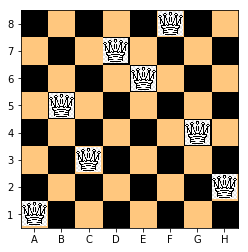

-----------------------------------------------------
[Solved Table] :


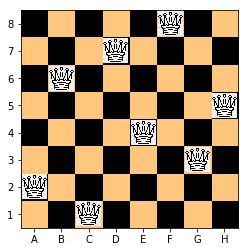

Elapsed Time  : 1.2909655570983887 s 
Iteration     : 184
-------------------------------------------------------------------


In [15]:
if __name__ == "__main__":
    
    table,rows,cols = CreateTable()

    Controls(table,rows,cols)   

    ShowTable(table)

    Solve(table)